# Комп'ютерний практикум №6
## Парний t-критерій Стьюдента
- з Обробки Біо-Медичних Даних
- студентки ФБМІ, групи БС-81
- Дворіцької Олени


In [2]:
import seaborn as sns
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as mp  
import math  
%matplotlib inline

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані

In [3]:
dataset = pd.read_csv("covid19_italy_province.csv")
dataset

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
7547,7547,2020-04-22T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2386
7548,7548,2020-04-22T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2279
7549,7549,2020-04-22T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,4164
7550,7550,2020-04-22T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2433


In [4]:
DF = pd.DataFrame(columns = ["Latitude", "Longitude"], index = [i for i in range(len(dataset))])
DF["Latitude"] = dataset["Latitude"]
DF["Longitude"] = dataset["Longitude"]
DF.index.name = "Person"
DF

,Latitude,Longitude
Person,,
0,42.351032,14.167546
1,42.351222,13.398438
2,42.464584,14.213648
3,42.658918,13.704400
4,0.000000,0.000000
...,...,...
7547,45.667546,12.245074
7548,45.434905,12.338452
7549,45.438390,10.993527


1.Побудувати графік, що відображає розкид даних в групах.

[Text(0.5, 0, 'tilt')]

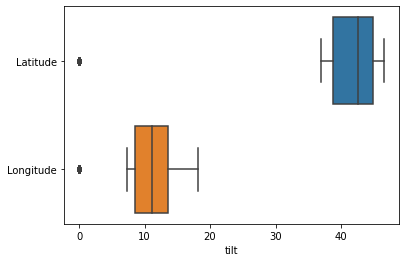

In [5]:
sns.boxplot(data = DF, orient = 'h').set(xlabel='tilt')

1.Написати функції: для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона.  
2.Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).
для визначення відмінності між групами за критерієм Стьюдента.  
3.Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [6]:
def pearson(df):
    correlation_table = pd.read_excel("Таблиця критичних значень кореляційного аналізу.xlsx")
    r1 = len(df)*(sum(df.iloc[:,0]*df.iloc[:,1])) - sum(df.iloc[:,0])*sum(df.iloc[:,1])
    r2 = (len(df)*sum(df.iloc[:,0]**2) - sum(df.iloc[:,0])**2)*(len(df)*sum(df.iloc[:,1]**2) - sum(df.iloc[:,1])**2)
    my_r = r1/np.sqrt(r2)
    df = len(df) - 2
    table_r = 0
    if(df < 130):
        for i in range(len(correlation_table)):
            if(df < int(correlation_table.iloc[i,0])):
                if(df != correlation_table.iloc[i-1,0]):
                    if((correlation_table.iloc[i,0]-df) >= abs(correlation_table.iloc[i-1,0]-df)):
                        table_r = correlation_table.iloc[i-1,1]
                    else: 
                        table_r = correlation_table.iloc[i,1]
                    break
                else:
                    table_r = correlation_table.iloc[i-1,1]
                    break
    else:
        table_r = correlation_table.iloc[36,1]
    return my_r, df, "Significant" if abs(my_r) > table_r else "Not significant"

In [7]:
def student(df):
    student_table = pd.read_excel("Таблица критических значений для парного критерия.xlsx")
    mean = np.mean(df.iloc[:,0] - df.iloc[:,1])
    std = np.std(df.iloc[:,0] - df.iloc[:,1])
    my_t = (mean/std)*np.sqrt(len(df))
    df = len(df)-1
    table_t = 0
    for i in range(len(student_table)):
        if(df < int(student_table.iloc[i,0])):
            if(df != student_table.iloc[i-1,0]):
                if((student_table.iloc[i,0]-df) >= abs(student_table.iloc[i-1,0]-df)):
                    table_t = student_table.iloc[i-1,1]
                else: 
                    table_t = student_table.iloc[i,1]
                break
            else:
                table_t = student_table.iloc[i-1,1]
                break
    return my_t, df, "Significant" if abs(my_t) > table_t else "Not significant"

1.Перевірити розбіжність на між групами на даних з п. 1.

In [8]:
pearson(DF)

(0.8252409056459732, 7550, 'Significant')

In [9]:
student(DF)

(183.33288881415862, 7551, 'Significant')

1.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

Висновок:  
    
Статистичної залежності між двома групами не виявлено.
Під час перевірки груп на відмінність за критерієм Стьюдента була прийнята альтернативна гіпотеза про відмінність середніx.